In [255]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [256]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [257]:
X=iris.data
Y=iris.target

In [258]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [259]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)


In [261]:
X_test

array([[6.8, 3. , 5.5, 2.1],
       [5.1, 3.8, 1.6, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.5, 3.5, 1.3, 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.3, 3.4, 5.6, 2.4],
       [6. , 2.7, 5.1, 1.6],
       [5.5, 2.5, 4. , 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [6.3, 2.8, 5.1, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 2.7, 4.2, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [7.1, 3. , 5.9, 2.1],
       [4.8, 3.4, 1.9, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.9, 3.2, 5.7, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [5.6, 3. , 4.1, 1.3],
       [6.4, 2.9, 4.3, 1.3],
       [6.7, 3.3, 5.7, 2.1],
       [4.8, 3. , 1.4, 0.1],
       [5.1, 3

In [262]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [263]:
y_predicted = model.predict(X_test)
y_predicted


array([2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0,
       1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 2, 2, 1, 1, 0])

In [264]:
model.predict_proba(X_test)

array([[5.76317786e-04, 9.27557610e-02, 9.06667921e-01],
       [8.86049038e-01, 1.13850951e-01, 1.00011351e-04],
       [7.19432657e-05, 1.93237933e-02, 9.80604263e-01],
       [6.88469823e-03, 5.12303716e-01, 4.80811586e-01],
       [8.68626395e-01, 1.31316413e-01, 5.71924515e-05],
       [8.37925904e-03, 3.08232368e-01, 6.83388373e-01],
       [4.67983209e-04, 4.27184288e-02, 9.56813588e-01],
       [3.74078632e-03, 2.67288028e-01, 7.28971186e-01],
       [5.22069672e-02, 7.48145469e-01, 1.99647564e-01],
       [8.98011605e-01, 1.01901713e-01, 8.66828692e-05],
       [4.94062369e-02, 7.83615620e-01, 1.66978143e-01],
       [6.42702586e-03, 3.27183364e-01, 6.66389610e-01],
       [8.39326948e-01, 1.60559083e-01, 1.13969047e-04],
       [8.31731283e-02, 7.10872410e-01, 2.05954462e-01],
       [3.96345791e-03, 3.13440115e-01, 6.82596427e-01],
       [8.73514783e-01, 1.26400718e-01, 8.44990207e-05],
       [8.64827941e-01, 1.35067314e-01, 1.04744816e-04],
       [1.56214557e-03, 9.34184

In [265]:
model.score(X_test,y_test)

0.95

In [266]:
accuracy = accuracy_score(y_test, y_predicted)
accuracy

0.95

# K means clustering

In [267]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.predict(X)

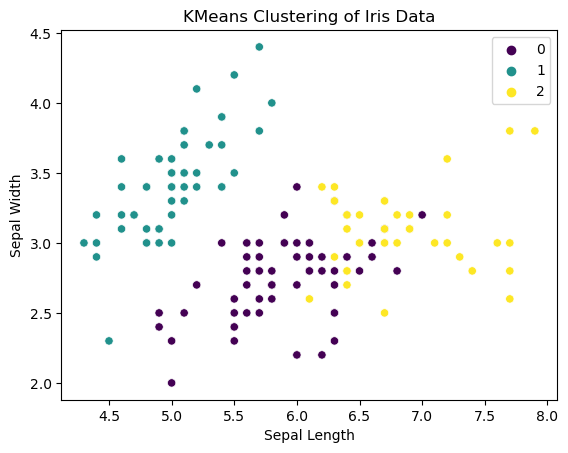

In [268]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title("KMeans Clustering of Iris Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


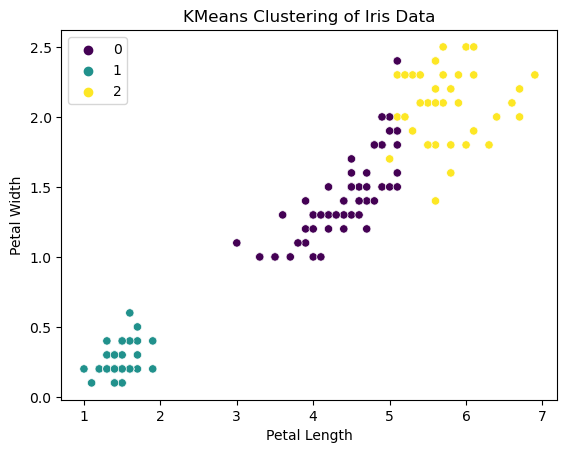

In [269]:
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=clusters, palette='viridis', legend='full')
plt.title("KMeans Clustering of Iris Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# Hierarchical Clustering

In [270]:
stdscaler=StandardScaler()
data=stdscaler.fit_transform(X)

In [271]:
linkage_data=linkage(data,method='ward')
label = iris.target_names[Y]


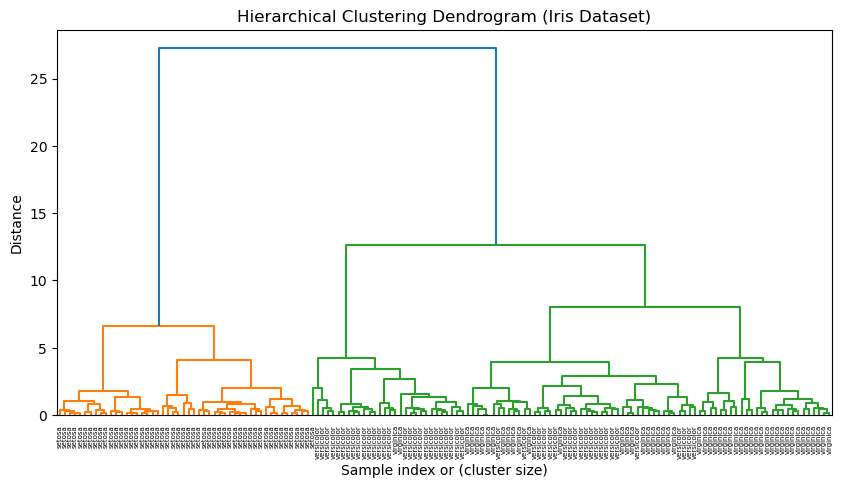

In [272]:
plt.figure(figsize=(10, 5))


dendrogram(linkage_data, labels=label, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# KNN

In [273]:
x_train=stdscaler.fit_transform(X_train)
x_test=stdscaler.fit_transform(X_test)

In [274]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [275]:
y_predicted = knn.predict(x_test)
y_predicted

C:\Users\Shivajith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2,
       2, 1, 2, 0, 2, 2, 2, 1, 1, 0])

In [276]:
accuracy = accuracy_score(y_test, y_predicted)
accuracy

0.725

In [277]:
report=classification_report(y_test, y_predicted, target_names=iris.target_names)
report

'              precision    recall  f1-score   support\n\n      setosa       1.00      0.95      0.98        44\n  versicolor       0.83      0.24      0.38        41\n   virginica       0.53      1.00      0.69        35\n\n    accuracy                           0.73       120\n   macro avg       0.79      0.73      0.68       120\nweighted avg       0.81      0.72      0.69       120\n'

In [278]:
confusionmatrix=confusion_matrix(y_test, y_predicted)
confusionmatrix

array([[42,  2,  0],
       [ 0, 10, 31],
       [ 0,  0, 35]], dtype=int64)

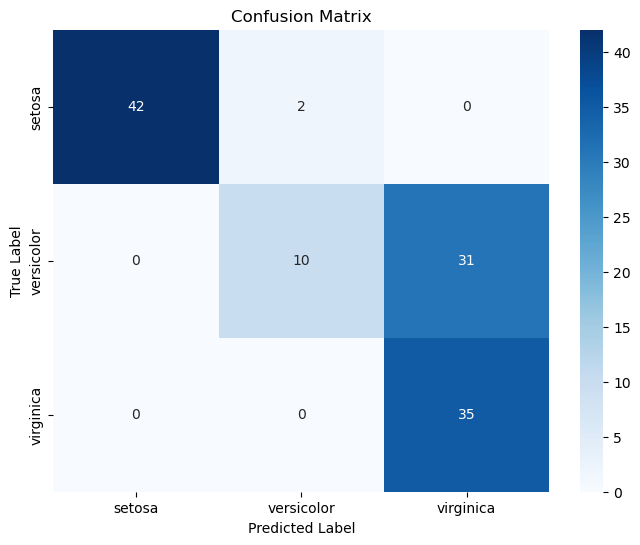

In [290]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmatrix, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


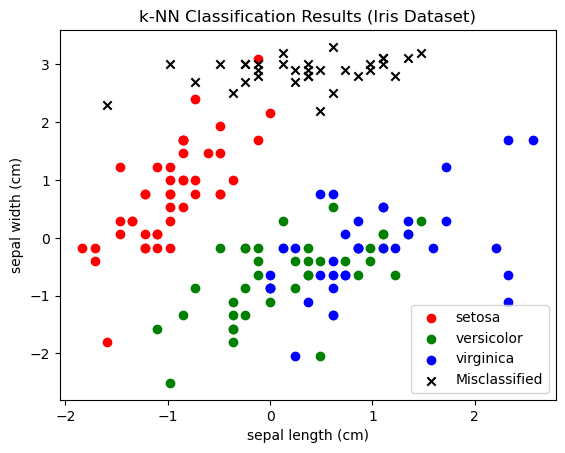

In [280]:
for i, color, label in zip(range(len(iris.target_names)), ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(x_test[y_test == i, 0], x_test[y_test == i, 1], color=color, label=label)
plt.scatter(x_test[y_predicted != y_test, 0], X_test[y_predicted != y_test, 1], color='black', marker='x', label='Misclassified')
plt.title('k-NN Classification Results (Iris Dataset)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

# SVM

In [281]:
svm=SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [282]:
y_pred = svm.predict(x_test)
y_pred

array([2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 2, 0, 2, 2, 2, 1, 1, 0])

In [283]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.725

In [284]:
class_report=classification_report(y_test, y_pred, target_names=iris.target_names)
class_report

'              precision    recall  f1-score   support\n\n      setosa       1.00      0.95      0.98        44\n  versicolor       0.83      0.24      0.38        41\n   virginica       0.53      1.00      0.69        35\n\n    accuracy                           0.73       120\n   macro avg       0.79      0.73      0.68       120\nweighted avg       0.81      0.72      0.69       120\n'

In [285]:
c_matrix=confusion_matrix(y_test, y_pred)
c_matrix

array([[42,  2,  0],
       [ 0, 10, 31],
       [ 0,  0, 35]], dtype=int64)

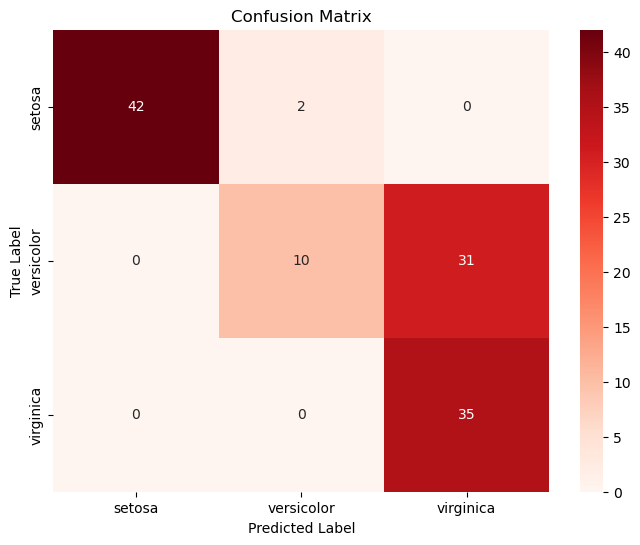

In [291]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='Reds', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

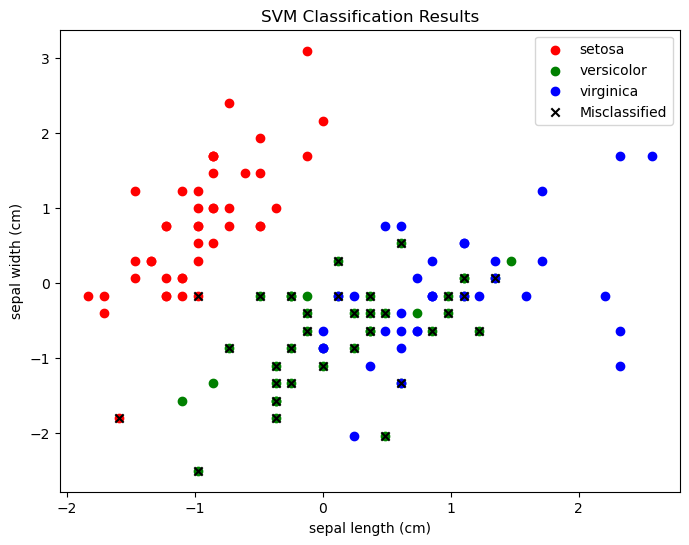

In [296]:
plt.figure(figsize=(8, 6))
for i, color, label in zip(range(len(iris.target_names)), ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(x_test[y_test == i, 0], x_test[y_test == i, 1], color=color, label=label)
plt.scatter(x_test[y_pred != y_test, 0], x_test[y_pred != y_test, 1], color='black', marker='x', label='Misclassified')
plt.title('SVM Classification Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()